# Proyek Analisis Data: Bike
- **Nama:** [Gloria Rustama Simbolon]
- **Email:** [m291d4kx3285@bangkit.academy]
- **ID Dicoding:** [gloria_rustama]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana peningkatan jumlah users dalam beberapa bulan?
- Pertanyaan 2: Bagaimana musim mempengaruhi jumlah penggunaan sepeda?
- Pertanyaan 3: Apakah ada pola penggunaan sepeda yang berbeda antara pengguna casual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Membuat tabel day

Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame. Kode ini akan menampilkan 5 baris pertama dari DataFrame day_df.

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membuat tabel hour 

Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama hour_df. Kode ini juga akan menampilkan 5 baris pertama dari hour_df

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data day_df

Untuk memeriksa tipe data dari tiap kolom yang ada di day_df, dilakukan menggunakan method info(). Jika diperhatikan, terdapat masalah tipe data yaitu pada kolom dteday yang seharusnya menjadi datetime.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kode berikut untuk memastikan ada atau tidak missing values pada setiap kolom. Dan kesimpulannya yaitu tidak terdapat missing value pada tabel day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kode berikut untuk memeriksa duplikasi yang terindikasi pada tabel day_df. Hasil yang ditampilkan yaitu 0 atau artinya tidak terdapat duplikasi data.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengubah tipe data pada kolom dteday

Diketahui pada kolom dteday terdapat kesalahan tipe data. Untuk itu, dilakukan menggunakan function to_datetime() yang sudah disediakan library pandas. 

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Untuk memastikan tipe data pada dteday sudah berubah, untuk memeriksanya saya menggunakan method info(). Type data pada dteday sudah berubah.

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore data day_df

Mengeksplorasi data day_df, untuk melihat rangkuman parameter statistik dari data day_df menggunakan method describe ()

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Kode dibawah digunakan untuk mengetahui value pada kolom season dalam tabel day_df. Hasil outputnya menampilkan nilai unik dengan angka 1, 2, 3, 4 yang direprensentasikan sebagai array. 

In [10]:
day_df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

Disini saya ingin mengganti value pada kolom season yaitu angka 1, 2, 3, 4 menjadi label musim springer, summer, fall, winter. Proses penggantian dilakukan dengan menggunakan method replace() dari pandas

In [11]:
ssn_df = ["springer", "summer", "fall", "winter"]
day_df['season'] = day_df['season'].replace([1,2,3,4], ssn_df)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Kemudian saya akan mengambil subset dari DataFrame day_df dengan menggunakan indexing berbasis posisi kolom. day_df.iloc[:,[5,0,13,14,15]] mengambil semua baris (:), namun hanya kolom-kolom dengan indeks posisi 5, 0, 13, 14, dan 15. Hasilnya akan disimpan dalam DataFrame baru yang disebut holiday_df.

In [12]:
holiday_df = day_df.iloc[:,[5,0,13,14,15]]
holiday_df

,holiday,instant,casual,registered,cnt
0,0,1,331,654,985
1,0,2,131,670,801
2,0,3,120,1229,1349
3,0,4,108,1454,1562
4,0,5,82,1518,1600
...,...,...,...,...,...
726,0,727,247,1867,2114
727,0,728,644,2451,3095
728,0,729,159,1182,1341
729,0,730,364,1432,1796


Pada kode dibawah ini DataFrame 'holiday_df' dikelompokkan berdasarkan nilai pada kolom 'holiday'. Setelah pengelompokan, dihitung jumlah nilai unik dari kolom 'instant' di setiap kelompok. Hasil perhitungan diurutkan secara menurun berdasarkan jumlah nilai unik 'instant' untuk setiap kelompok 'holiday'.

In [13]:
holiday_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    710
1     21
Name: instant, dtype: int64

Pada kode berikut ini DataFrame 'holiday_df' dikelompokkan berdasarkan nilai pada kolom 'holiday'. Disini akan dilakukan beberapa operasi agregasi sekaligus sehingga menggunakan method agg ({...})

In [14]:
holiday_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt":  ["min", "max"]
})

instant  casual registered   cnt      
        nunique     sum        sum   min   max
holiday                                       
0           710  597658    2616586    22  8714
1            21   22359      56076  1000  7403

Selanjutnya saya mengelompokan data dalam DataFrame 'holiday_df' berdasarkan nilai pada kolom 'holiday'. Kemudian, dilakukan agregasi untuk menghitung total 'casual', 'registered', dan 'cnt' untuk setiap kelompok 'holiday'. Dan melakukan merging DataFrames kolom holiday dan dteday kemudian menghapus duplikat baris. 

In [15]:
holiday_summary = holiday_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

dteday_df = day_df[['holiday', 'dteday']].drop_duplicates()
holiday_summary = holiday_summary.merge(dteday_df, on="holiday", how="left")

holiday_summary

,holiday,casual,registered,cnt,dteday
0,0,597658,2616586,3214244,2011-01-01
1,0,597658,2616586,3214244,2011-01-02
2,0,597658,2616586,3214244,2011-01-03
3,0,597658,2616586,3214244,2011-01-04
4,0,597658,2616586,3214244,2011-01-05
...,...,...,...,...,...
726,1,22359,56076,78435,2012-09-03
727,1,22359,56076,78435,2012-10-08
728,1,22359,56076,78435,2012-11-12
729,1,22359,56076,78435,2012-11-22


Selanjutnya saya akan membuat DataFrame baru yaitu season_df yang terdiri dari kolom-kolom yang sudah dipilih

In [16]:
season_df = day_df.iloc[:,[2,0,1,13,14,15]]
season_df

,season,instant,dteday,casual,registered,cnt
0,springer,1,2011-01-01,331,654,985
1,springer,2,2011-01-02,131,670,801
2,springer,3,2011-01-03,120,1229,1349
3,springer,4,2011-01-04,108,1454,1562
4,springer,5,2011-01-05,82,1518,1600
...,...,...,...,...,...,...
726,springer,727,2012-12-27,247,1867,2114
727,springer,728,2012-12-28,644,2451,3095
728,springer,729,2012-12-29,159,1182,1341
729,springer,730,2012-12-30,364,1432,1796


Kemudian saya mengelompokkan baris-baris dalam DataFrame 'season_df' berdasarkan nilai dalam kolom 'season'. Sama halnya seperti pada DataFrame holiday_df

In [17]:
season_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt":  ["min", "max"]
})

instant  casual registered   cnt      
         nunique     sum        sum   min   max
season                                         
fall         188  226091     835038  1115  8714
springer     181   60622     410726   431  7836
summer       184  203522     715067   795  8362
winter       178  129782     711831    22  8555

Dibawah ini saya melakukan pengelompokan baris dalam DataFrame season_df berdasarkan nilai dari kolom season. Sama halnya seperti pada DataFrame holiday_df, dan menghasilkan output yang ditampilkan di season_summary

In [18]:
season_summary = season_df.groupby(by="season").agg({
    "instant": "sum",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

dteday_df = day_df[['season', 'dteday']].drop_duplicates()
dteday_df['season'] = dteday_df['season'].astype('str')
season_summary = season_summary.merge(dteday_df, on="season", how="left")

season_summary

,season,instant,casual,registered,cnt,dteday
0,fall,75482,226091,835038,1061129,2011-06-21
1,fall,75482,226091,835038,1061129,2011-06-22
2,fall,75482,226091,835038,1061129,2011-06-23
3,fall,75482,226091,835038,1061129,2011-06-24
4,fall,75482,226091,835038,1061129,2011-06-25
...,...,...,...,...,...,...
726,winter,87754,129782,711831,841613,2012-12-16
727,winter,87754,129782,711831,841613,2012-12-17
728,winter,87754,129782,711831,841613,2012-12-18
729,winter,87754,129782,711831,841613,2012-12-19


### Eksplorasi data all_df

Kode berikut melakukan pengelompokan data berdasarkan season pada DataFrame season_summary dan holiday pada DataFrame holiday_summary. Kemudian, dihitung jumlah nilai unik dari kolom 'cnt' untuk setiap grup musim dan hari libur, dan hasilnya diurutkan secara menurun.

In [19]:
season_summary.groupby(by="season").cnt.nunique().sort_values(ascending=False)
holiday_summary.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    1
1    1
Name: cnt, dtype: int64

Kode dibawah ini melakukan merging antara dua DataFrame yaitu season_summary dan holiday_summary berdasarkan kolom 'dteday' dengan menggunakan metode left join. Hasil penggabungan disimpan dalam DataFrame baru yang disebut all_df. 

In [20]:
all_df = pd.merge(
    left=season_summary,
    right=holiday_summary,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,season,instant,casual_x,registered_x,cnt_x,dteday,holiday,casual_y,registered_y,cnt_y
0,fall,75482,226091,835038,1061129,2011-06-21,0,597658,2616586,3214244
1,fall,75482,226091,835038,1061129,2011-06-22,0,597658,2616586,3214244
2,fall,75482,226091,835038,1061129,2011-06-23,0,597658,2616586,3214244
3,fall,75482,226091,835038,1061129,2011-06-24,0,597658,2616586,3214244
4,fall,75482,226091,835038,1061129,2011-06-25,0,597658,2616586,3214244


Kode dibawah melakukan pengelompokan berdasarkan nilai pada kolom 'instant' dalam DataFrame all_df. Kemudian, dilakukan agregasi terhadap kolom-kolom lainnya dengan fungsi-fungsi yang telah ditentukan. 

In [21]:
all_df.groupby(by="instant").agg({
    "instant": "nunique",
    "registered_x": "sum",
    "casual_x": "sum",
    "cnt_x": "sum"
})

,instant,registered_x,casual_x,cnt_x
instant,,,,
47546,1,74341406,10972582,85313988
56764,1,131572328,37448048,169020376
75482,1,156987144,42505108,199492252
87754,1,126705918,23101196,149807114


Selanjutnya melakukan grouping berdasarkan kolom 'dteday' dan 'holiday' dalam DataFrame all_df. Kemudian, dilakukan agregasi terhadap kolom 'registered_x' dan 'registered_y' dengan fungsi 'sum', sehingga menjumlahkan semua nilai pada kedua kolom tersebut untuk setiap kelompok yang terbentuk dari pengelompokan sebelumnya.

In [28]:
all_df.groupby(by=["dteday", "holiday"]).agg({
    "registered_x": "sum",
    "registered_y": "sum"
})

,,registered_x,registered_y
dteday,holiday,,
2011-01-01,0,410726,2616586
2011-01-02,0,410726,2616586
2011-01-03,0,410726,2616586
2011-01-04,0,410726,2616586
2011-01-05,0,410726,2616586
...,...,...,...
2012-12-27,0,410726,2616586
2012-12-28,0,410726,2616586
2012-12-29,0,410726,2616586


In [23]:
all_df.groupby(by=["dteday", "season"]).agg({
    "registered_x": "sum",
    "registered_y": "sum"
})

,,registered_x,registered_y
dteday,season,,
2011-01-01,springer,410726,2616586
2011-01-02,springer,410726,2616586
2011-01-03,springer,410726,2616586
2011-01-04,springer,410726,2616586
2011-01-05,springer,410726,2616586
...,...,...,...
2012-12-27,springer,410726,2616586
2012-12-28,springer,410726,2616586
2012-12-29,springer,410726,2616586


In [29]:
all_df

,season,instant,casual_x,registered_x,cnt_x,dteday,holiday,casual_y,registered_y,cnt_y
0,fall,75482,226091,835038,1061129,2011-06-21,0,597658,2616586,3214244
1,fall,75482,226091,835038,1061129,2011-06-22,0,597658,2616586,3214244
2,fall,75482,226091,835038,1061129,2011-06-23,0,597658,2616586,3214244
3,fall,75482,226091,835038,1061129,2011-06-24,0,597658,2616586,3214244
4,fall,75482,226091,835038,1061129,2011-06-25,0,597658,2616586,3214244
...,...,...,...,...,...,...,...,...,...,...
726,winter,87754,129782,711831,841613,2012-12-16,0,597658,2616586,3214244
727,winter,87754,129782,711831,841613,2012-12-17,0,597658,2616586,3214244
728,winter,87754,129782,711831,841613,2012-12-18,0,597658,2616586,3214244
729,winter,87754,129782,711831,841613,2012-12-19,0,597658,2616586,3214244


In [25]:
all_df.to_csv("dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana peningkatan jumlah users dalam beberapa bulan?

In [32]:
monthly_users_df = all_df.resample(rule='M', on='dteday').agg({
        "instant": "nunique",
        "cnt_x": "sum"
    })
monthly_users_df.index = monthly_users_df.index.strftime('%B')
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df.rename(columns={
        "instant": "index",
        "cnt_x": "totality"
    }, inplace=True)
monthly_users_df.head()

C:\Users\advan\AppData\Local\Temp\ipykernel_28000\2131328856.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_df = all_df.resample(rule='M', on='dteday').agg({


,dteday,index,totality
0,January,1,14611788
1,February,1,13197744
2,March,2,19531439
3,April,1,27557670
4,May,1,28476259


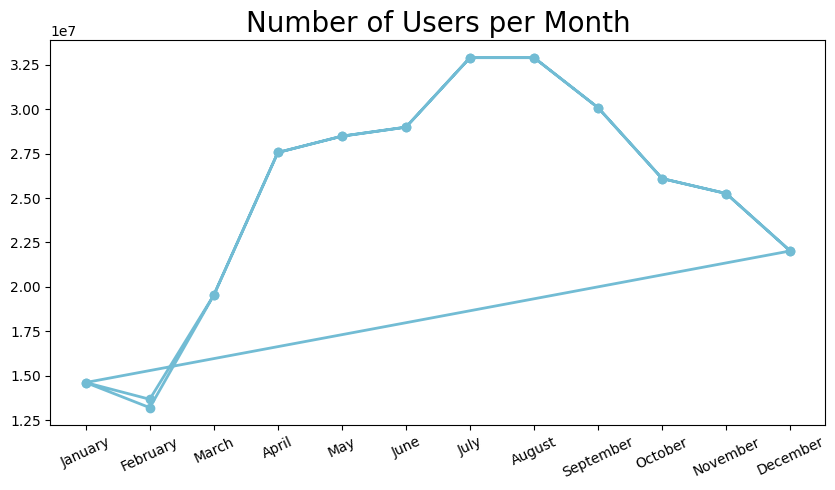

In [34]:
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_users_df["dteday"], monthly_users_df["totality"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Users per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=25) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2: Bagaimana musim mempengaruhi jumlah penggunaan sepeda?

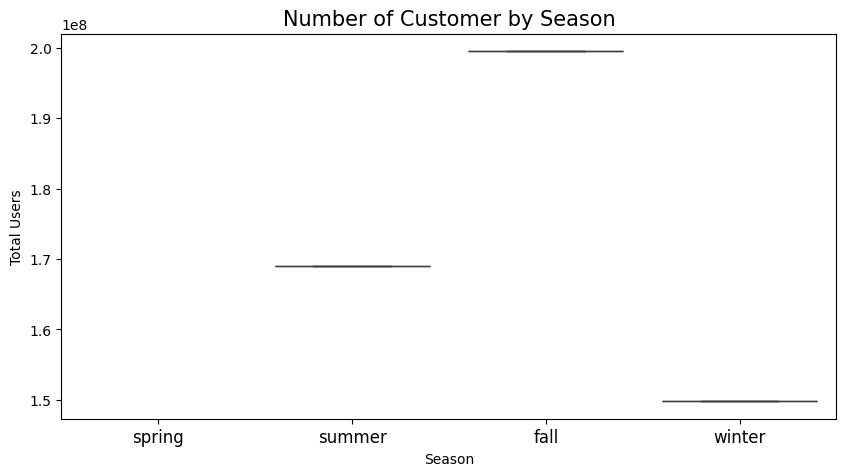

In [84]:
byseason_df = all_df.groupby(by="season")['cnt_x'].sum().reset_index()
byseason_df.rename(columns={"cnt_x": "total_users"}, inplace=True)
byseason_df['season'] = pd.Categorical(byseason_df['season'], ["spring", "summer", "fall", "winter"])

# Membuat boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(
    y="total_users", 
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel("Total Users")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Apakah ada pola penggunaan sepeda yang berbeda antara pengguna casual dan pengguna registered?

In [81]:
byregistered_df = all_df.groupby(by="dteday").registered_x.sum().reset_index()
byregistered_df.rename(columns={
    "registered_x": "total_users"
}, inplace=True)
byregistered_df.head()

,dteday,total_users
0,2011-01-01,410726
1,2011-01-02,410726
2,2011-01-03,410726
3,2011-01-04,410726
4,2011-01-05,410726


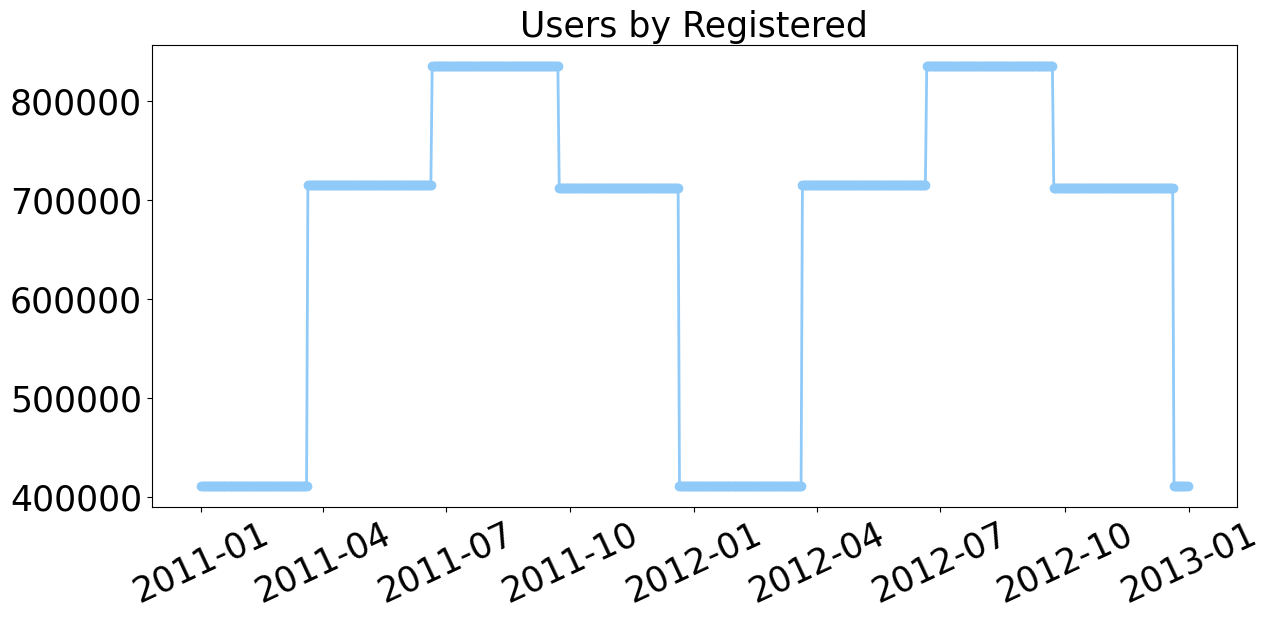

In [85]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(
        byregistered_df["dteday"],
        byregistered_df["total_users"],
        marker='o', 
        linewidth=2,
        color="#90CAF9"
    )
ax.set_title("Users by Registered", loc="center", fontsize=25)
plt.xticks(fontsize=10, rotation=25) 
plt.yticks(fontsize=10)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

In [86]:
bycasual_df = all_df.groupby(by="dteday").casual_x.sum().reset_index()
bycasual_df.rename(columns={
    "casual_x": "total_users"
}, inplace=True)
bycasual_df.head()

,dteday,total_users
0,2011-01-01,60622
1,2011-01-02,60622
2,2011-01-03,60622
3,2011-01-04,60622
4,2011-01-05,60622


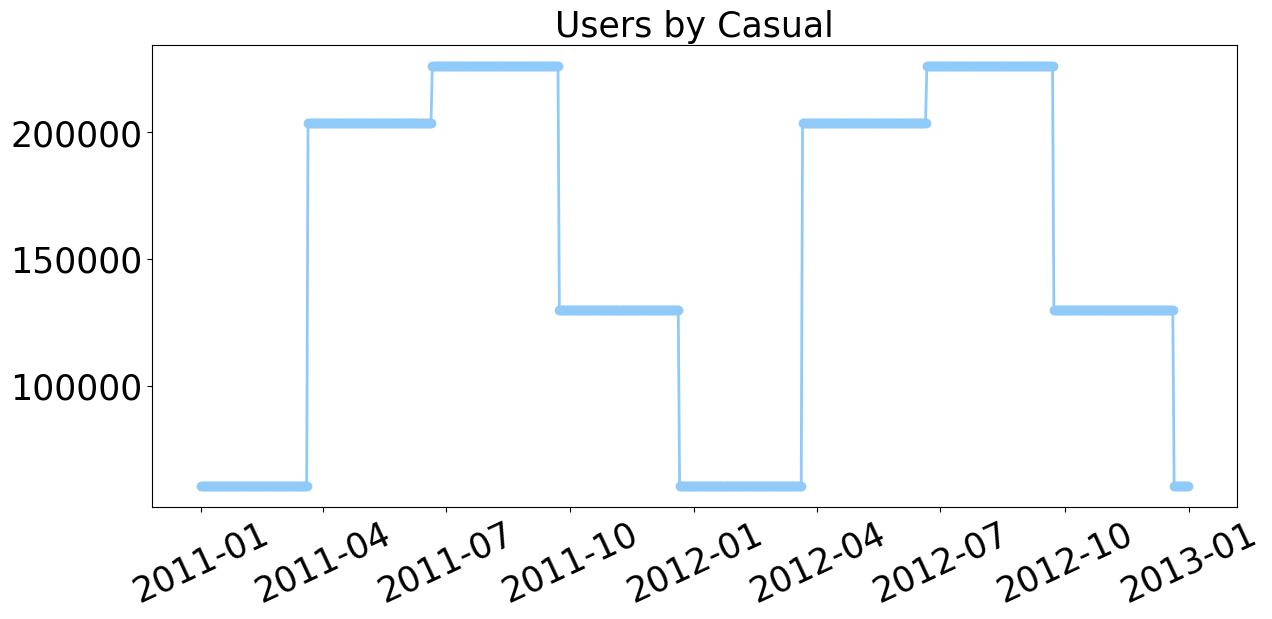

In [87]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(
        bycasual_df["dteday"],
        bycasual_df["total_users"],
        marker='o', 
        linewidth=2,
        color="#90CAF9"
    )
ax.set_title("Users by Casual", loc="center", fontsize=25)
plt.xticks(fontsize=10, rotation=25) 
plt.yticks(fontsize=10)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

## Conclusion

- Conclution pertanyaan 1: 
Pada grafik yang ditampilkan terdapat peningkatan cukup tinggi pada bulan Juli dan Agustus, sedangkan penggunaan paling rendah terdapat pada bulan Januari dan Februari.

- Conclution pertanyaan 2:
Pada grafik yang ditampilkan terlihat angka stabil pada summer dan terjadi peningkatan angka di fall dan kemudian menurun saat winter. 

- Conclution pertanyaan 3: 
Pada grafik registered, terlihat angka stabil pada bulan April dan mengalami peningkatan saat bulan Juli, namun pada Januari memiliki jumlah user terdikit.
Pada grafik casual, terlihat angka stabil pada April lalu meningkat pada Juli namun menurun pada bulan Oktober.